# Distribution Plots

In [3]:
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
tips = sns.load_dataset('tips')

In [6]:
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


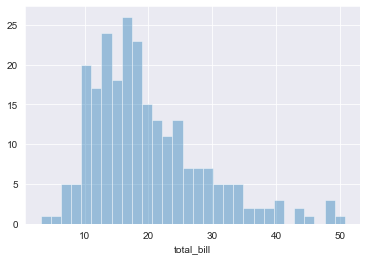

In [7]:
sns.set_style('darkgrid')


sns.distplot(tips['total_bill'],kde = False,bins = 30)

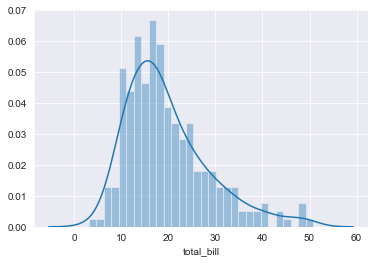

In [8]:
sns.distplot(tips['total_bill'],kde = True,bins = 30)

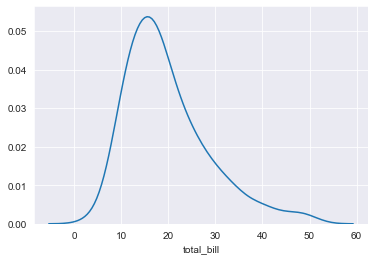

In [30]:
sns.distplot(tips['total_bill'],hist = False,bins = 30)

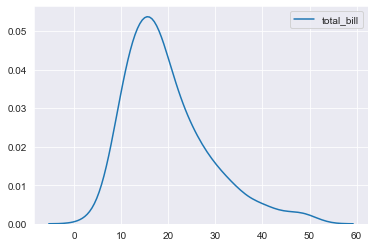

In [31]:
sns.kdeplot(tips['total_bill'])

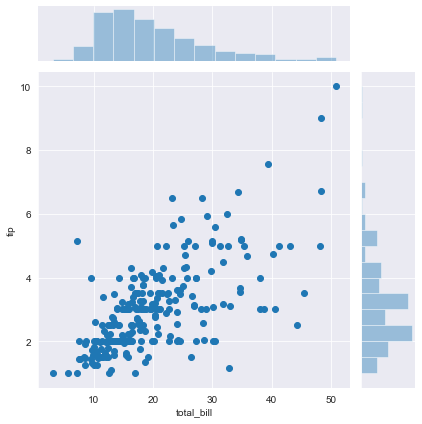

In [25]:
sns.jointplot(x='total_bill',y='tip',data=tips)

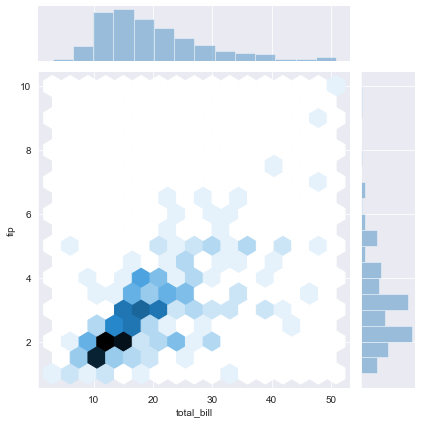

In [24]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind = 'hex')

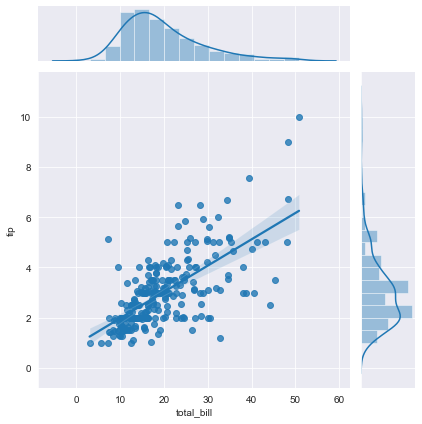

In [23]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind = 'reg')

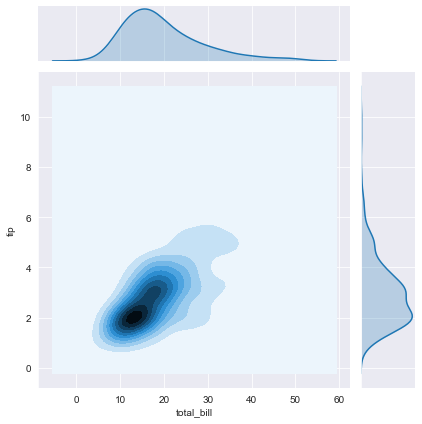

In [22]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind = 'kde')

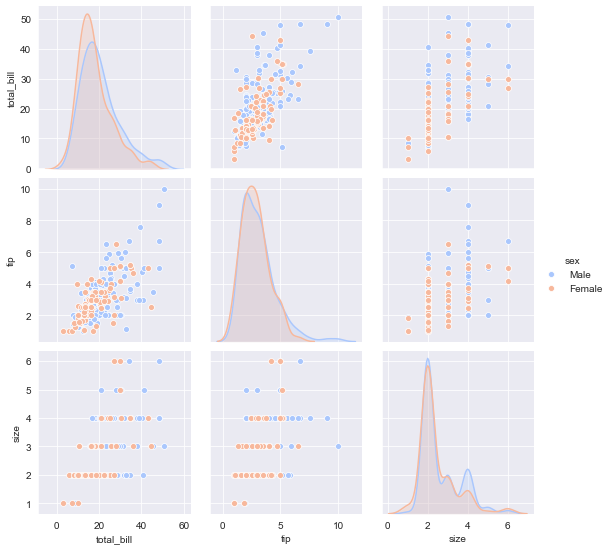

In [21]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

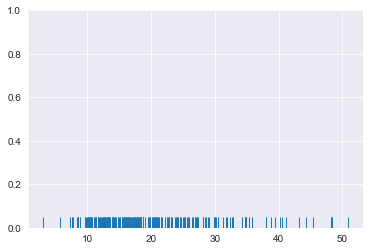

In [20]:
sns.rugplot(tips['total_bill'])

In [19]:
#KDE plots stand for kernal density estimation plots
# A Gaussian curve is constructed over each point
# Then they are added together to form one line

(0, 1)

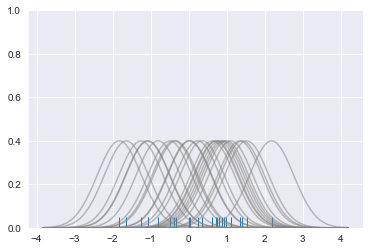

In [27]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

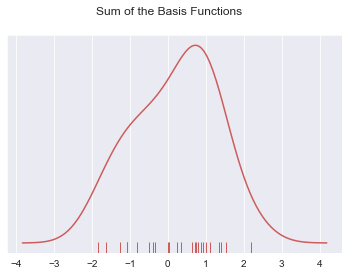

In [28]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

# Categorical Plots

In [34]:
import numpy as np

In [32]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


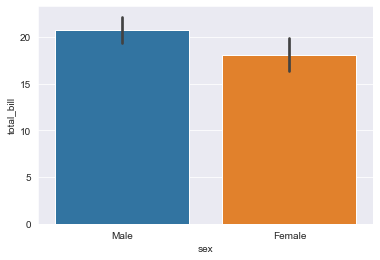

In [33]:
# x is categorical y is numeric
sns.barplot(x='sex',y='total_bill',data=tips) # Mean by default

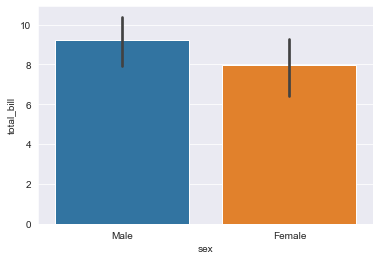

In [35]:
# Here estimator is standard deviation
sns.barplot(x='sex',y='total_bill',data=tips, estimator=np.std)

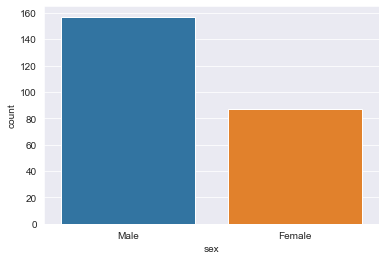

In [37]:
sns.countplot(x='sex',data=tips) #Counts occurences

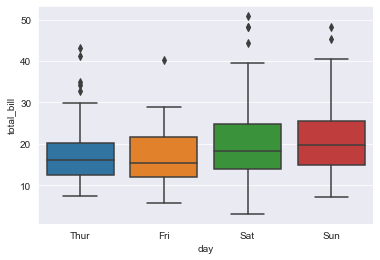

In [38]:
sns.boxplot(x='day',y='total_bill',data=tips)

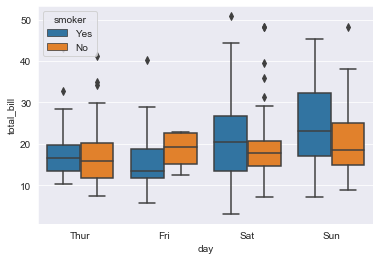

In [39]:
sns.boxplot(x='day',y='total_bill',data=tips,hue = 'smoker')

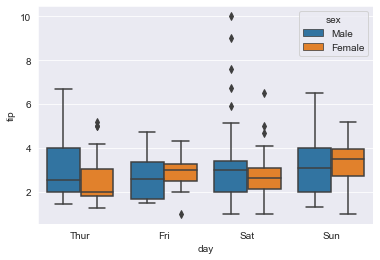

In [41]:
sns.boxplot(x='day',y='tip',data=tips,hue='sex')

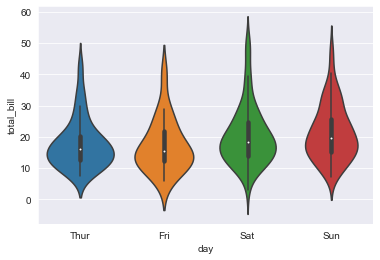

In [42]:
sns.violinplot(x='day',y='total_bill',data=tips)

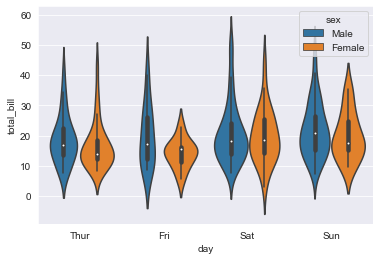

In [43]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex')

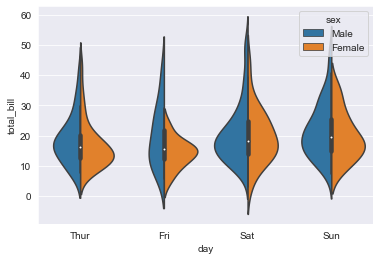

In [44]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split = True)

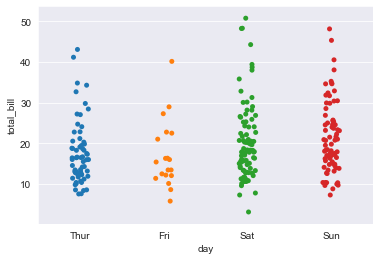

In [47]:
sns.stripplot(x='day',y='total_bill',data=tips)

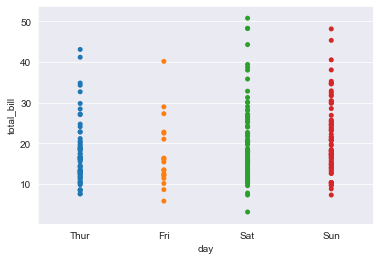

In [48]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=False)

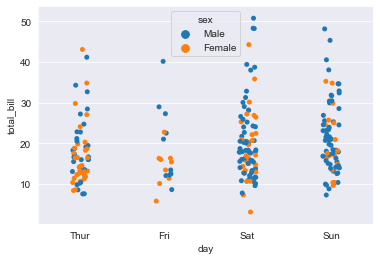

In [50]:
sns.stripplot(x='day',y='total_bill',data=tips,hue = 'sex')

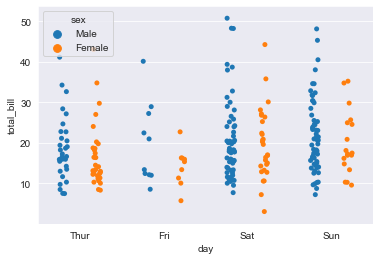

In [53]:
#split was renamed to dodge
sns.stripplot(x='day',y='total_bill',data=tips,hue = 'sex', dodge = True)

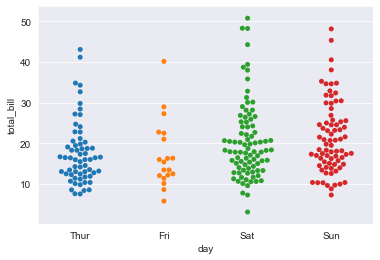

In [54]:
sns.swarmplot(x='day',y='total_bill', data=tips)

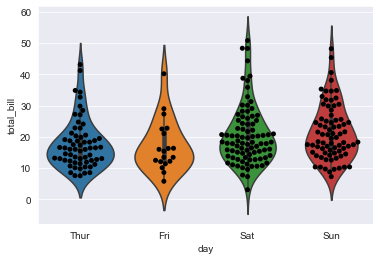

In [55]:
sns.violinplot(x='day',y='total_bill', data=tips)
sns.swarmplot(x='day',y='total_bill', data=tips, color='black')

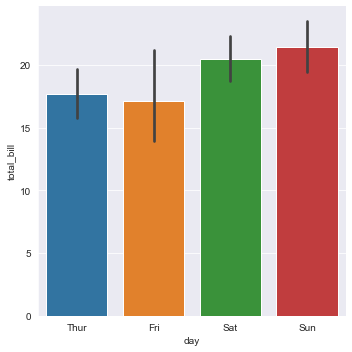

In [57]:
# sns.factorplot() was renamed to sns.catplot()
sns.catplot(x='day',y='total_bill', data=tips,kind='bar')

# Matrix Plots

In [58]:
flights = sns.load_dataset('flights')

In [59]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [60]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [63]:
# Matrix for has variable names for columns AND row
tc = tips.corr()
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


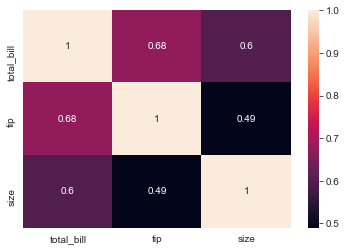

In [68]:
sns.heatmap(tc,annot = True)

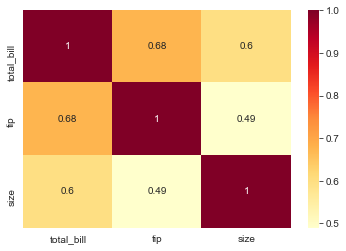

In [67]:
sns.heatmap(tc,cmap='YlOrRd',annot = True)

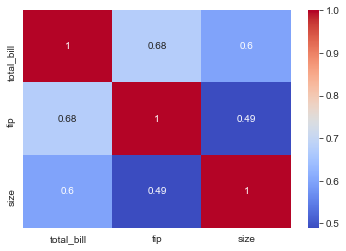

In [69]:
sns.heatmap(tc,cmap='coolwarm',annot = True)

In [71]:
fp = flights.pivot_table(index = 'month', columns = 'year', values = 'passengers')
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


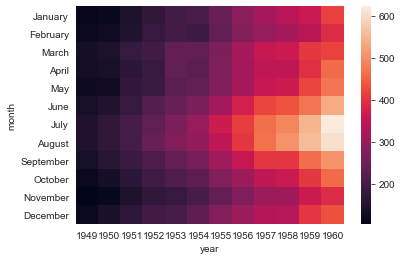

In [72]:
sns.heatmap(fp)

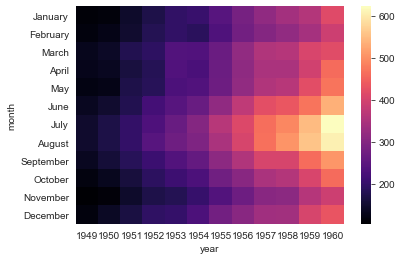

In [73]:
sns.heatmap(fp,cmap = 'magma')

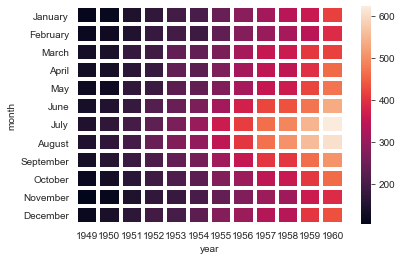

In [74]:
sns.heatmap(fp, linecolor='white',linewidths=3)

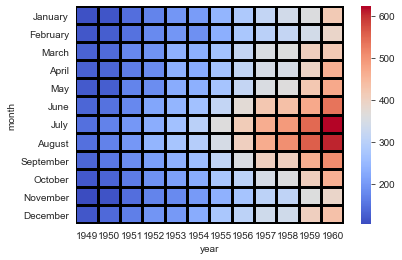

In [76]:
sns.heatmap(fp,cmap='coolwarm', linecolor = 'black',linewidths=2)

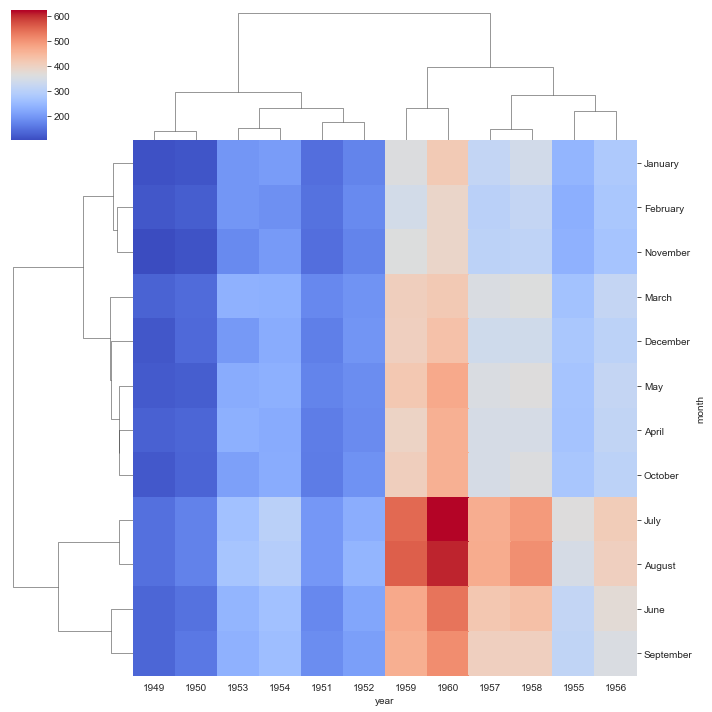

In [78]:
sns.clustermap(fp, cmap='coolwarm')

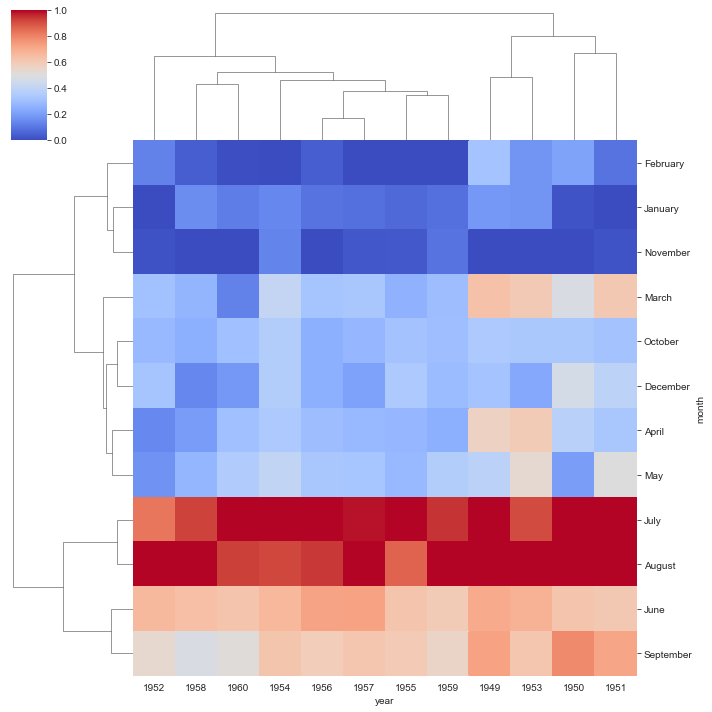

In [79]:
sns.clustermap(fp, cmap='coolwarm',standard_scale = 1)

# Grids

In [93]:
# Grids are class objects that are more general plotting functions
# Allows more intricate customization

In [80]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [82]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

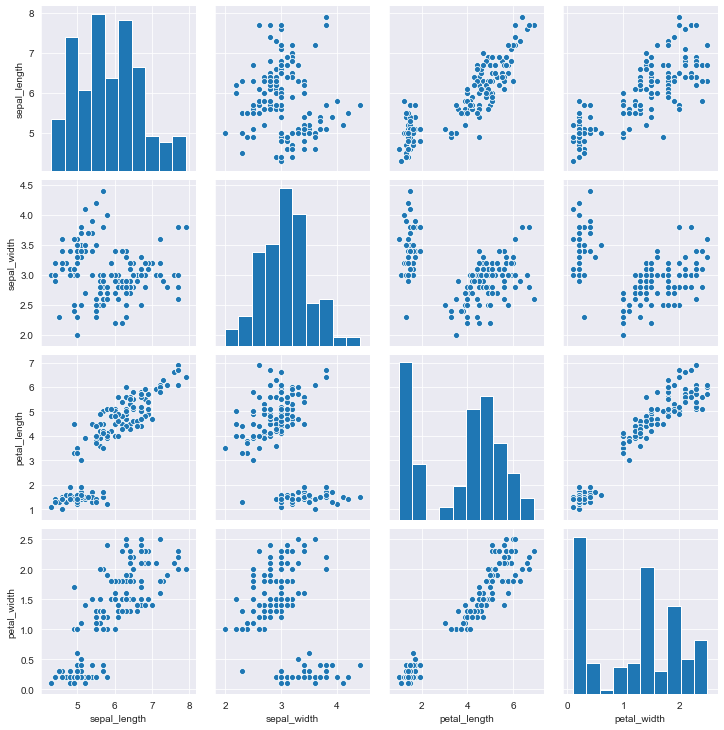

In [83]:
sns.pairplot(iris)

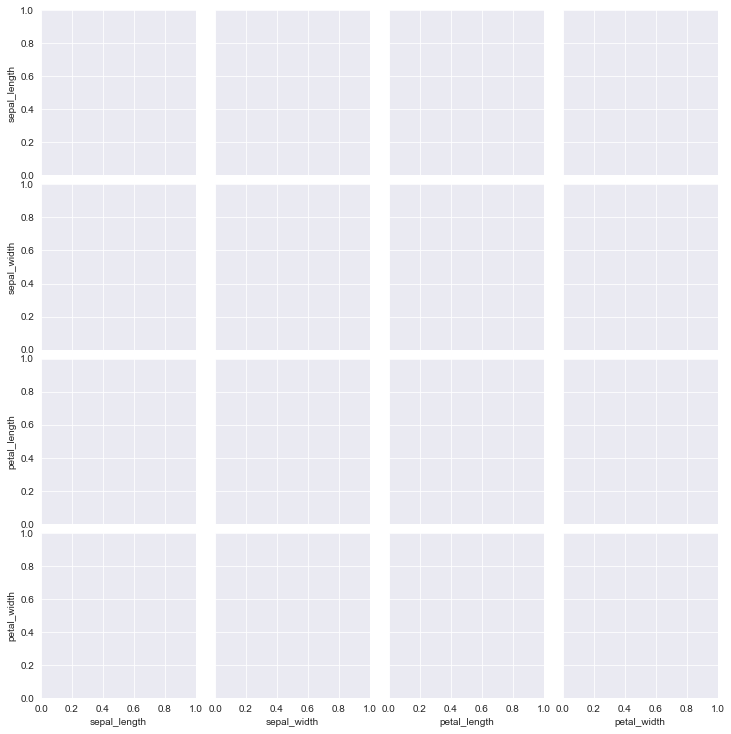

In [84]:
sns.PairGrid(iris)

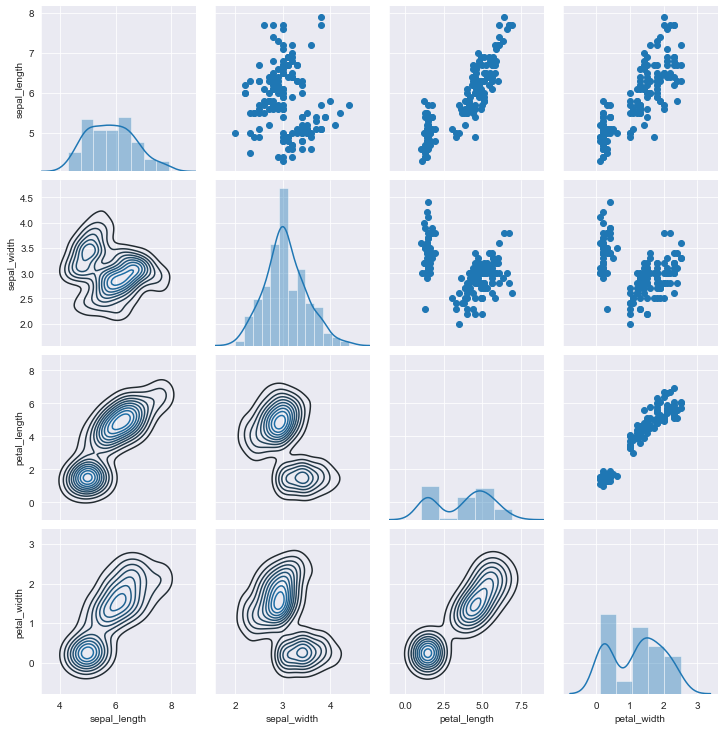

In [88]:
g = sns.PairGrid(iris)
#g.map(plt.scatter)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [89]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


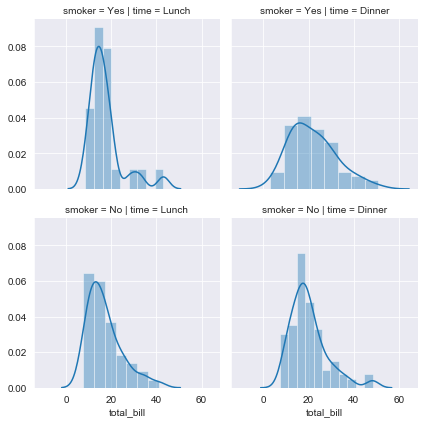

In [91]:
g = sns.FacetGrid(data=tips, col='time', row='smoker')
g.map(sns.distplot, 'total_bill')

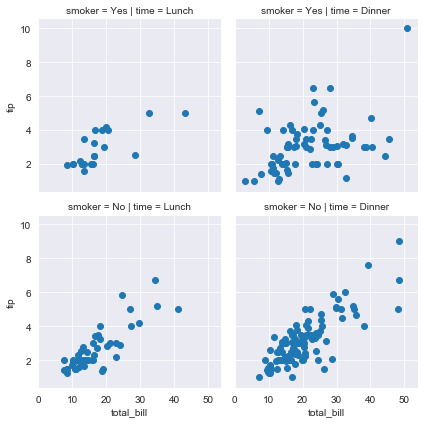

In [92]:
# Plot type that need more than one argument
g = sns.FacetGrid(data=tips, col='time', row='smoker')
g.map(plt.scatter, 'total_bill', 'tip')

# Regression Plots

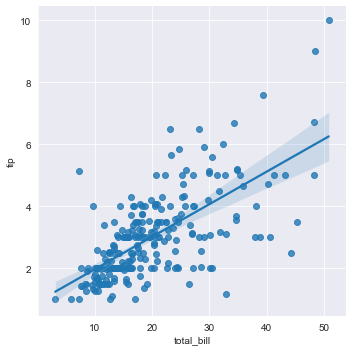

In [94]:
sns.lmplot(x='total_bill',y = 'tip',data = tips)

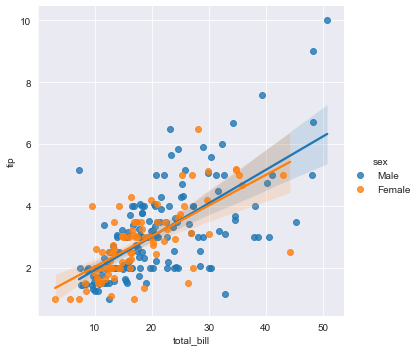

In [95]:
sns.lmplot(x='total_bill',y = 'tip',data = tips, hue = 'sex')

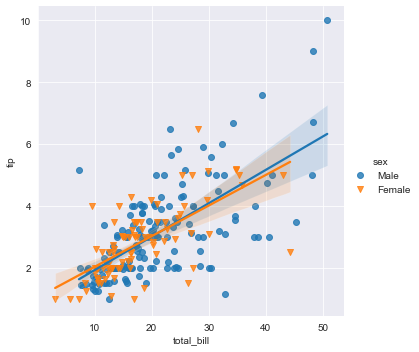

In [96]:
sns.lmplot(x='total_bill',y = 'tip',data = tips, hue = 'sex', markers = ['o','v'])

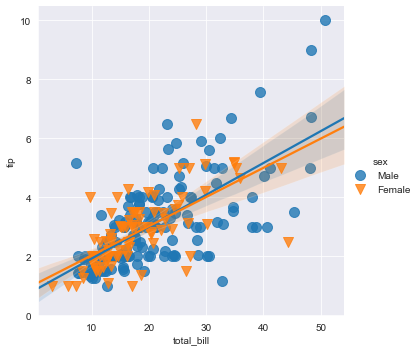

In [9]:
#passing in matplot lib parameters
sns.lmplot(x='total_bill',y = 'tip',data = tips, hue = 'sex',truncate=False, markers = ['o','v'],
          scatter_kws = {'s':100})

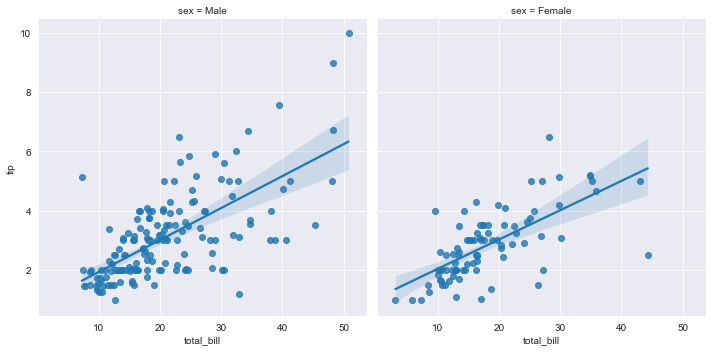

In [101]:
sns.lmplot(x='total_bill',y = 'tip',data = tips, col = 'sex')

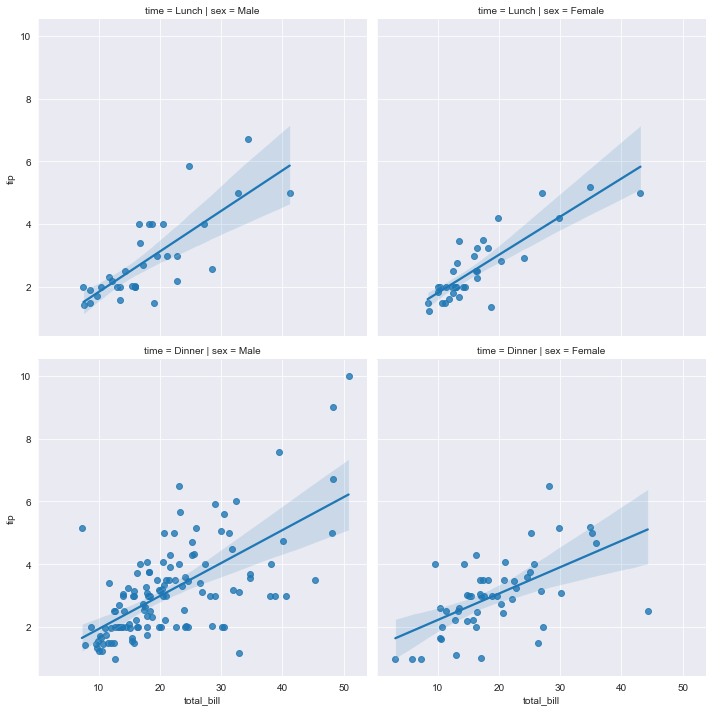

In [102]:
sns.lmplot(x='total_bill',y = 'tip',data = tips, col = 'sex', row = 'time')

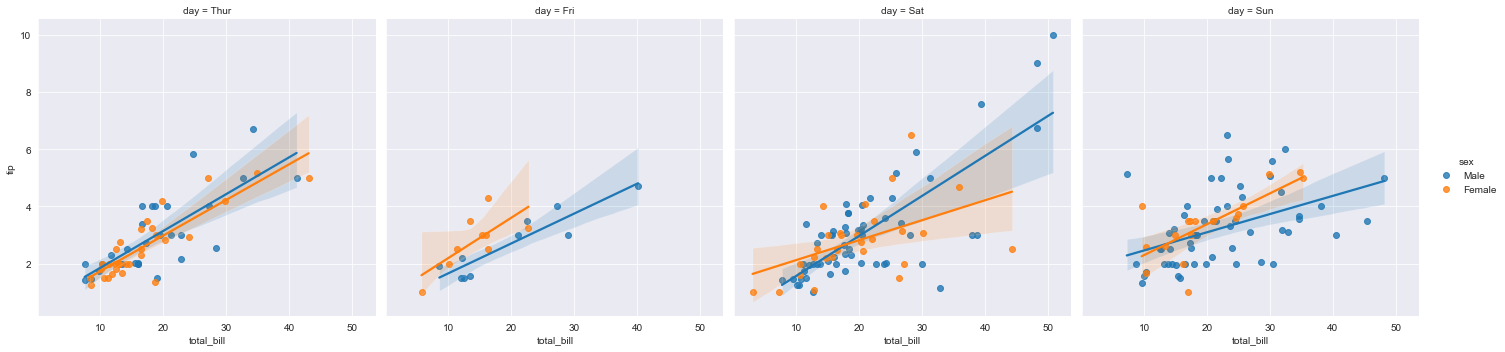

In [103]:
sns.lmplot(x='total_bill',y = 'tip',data = tips, col = 'day', hue = 'sex')

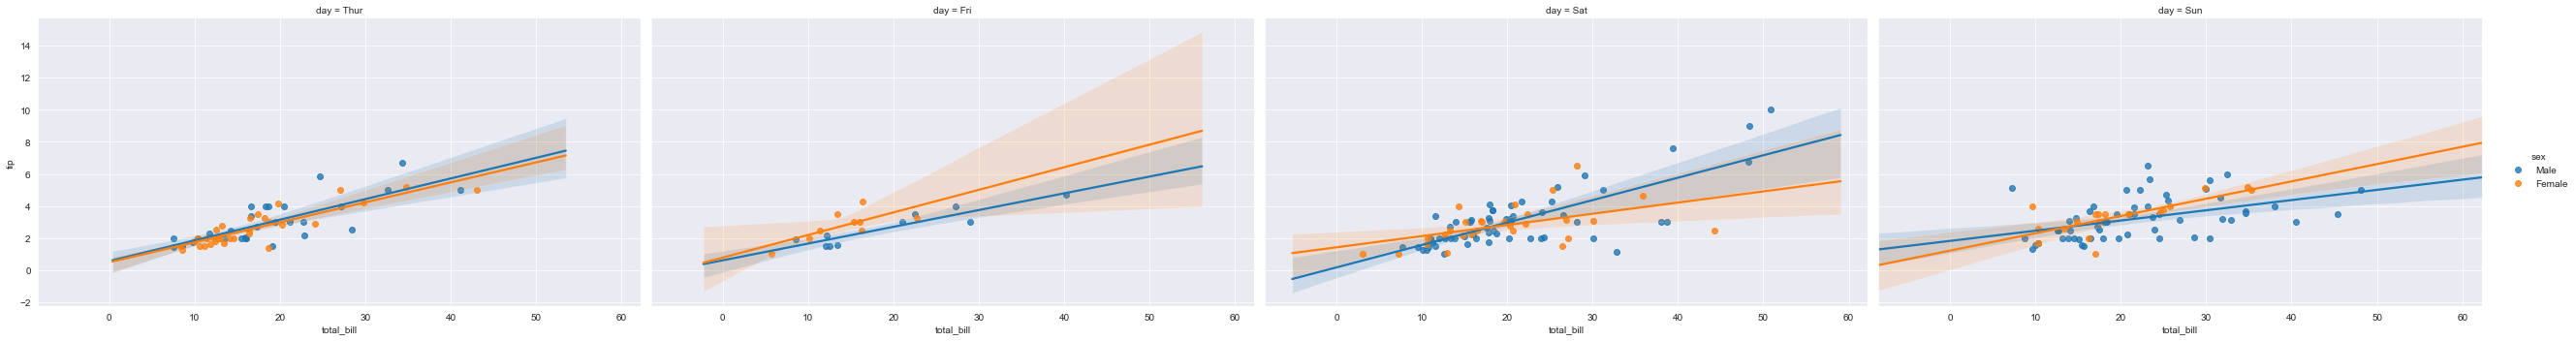

In [115]:
#size parameter renamed height
sns.lmplot(x='total_bill',y = 'tip',data = tips, col = 'day', hue = 'sex',
          aspect = 1.8, truncate = False)

# Style and Color

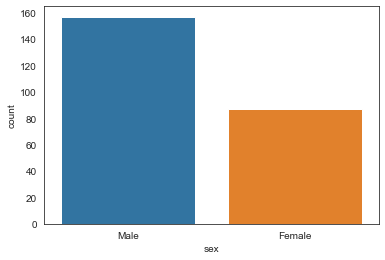

In [117]:
sns.set_style('white')
sns.countplot(x='sex',data=tips)

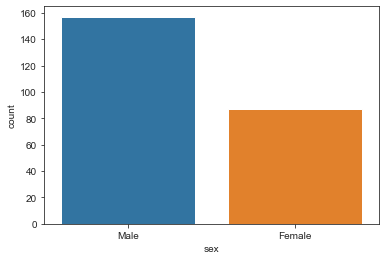

In [118]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)

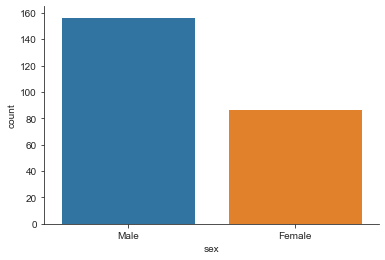

In [121]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)
sns.despine()

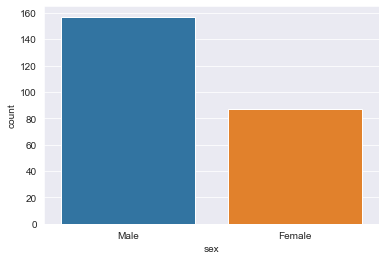

In [119]:
sns.set_style('darkgrid')
sns.countplot(x='sex',data=tips)

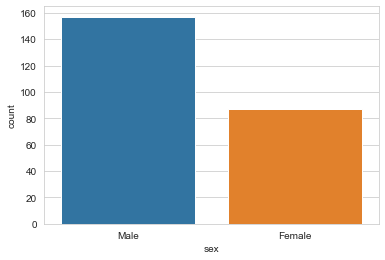

In [120]:
sns.set_style('whitegrid')
sns.countplot(x='sex',data=tips)

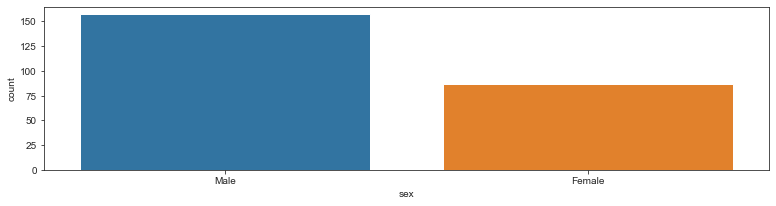

In [122]:
# Set the fig size in matplotlib and seaboarn calls it
plt.figure(figsize = (13,3))
sns.countplot(x='sex',data=tips)

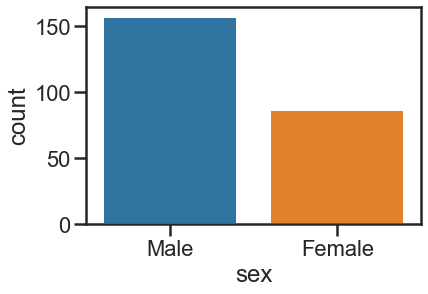

In [125]:
# with set_context you ccan specify where the figue will be displayed
# This will adjust the size and font size etc.
sns.set_context('poster')
sns.countplot(x='sex',data=tips)

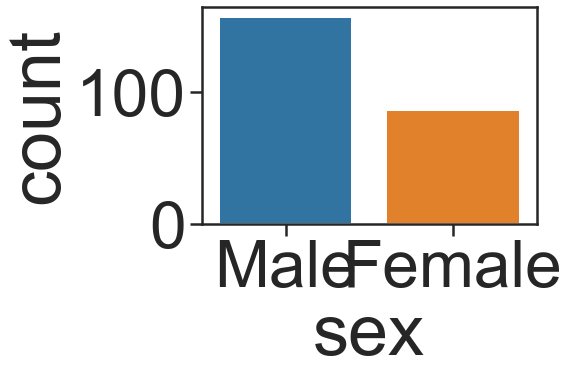

In [126]:
sns.set_context('poster', font_scale = 3)
sns.countplot(x='sex',data=tips)

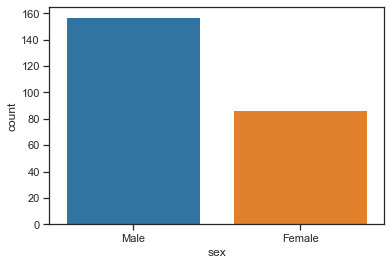

In [127]:
sns.set_context('notebook')
sns.countplot(x='sex',data=tips)

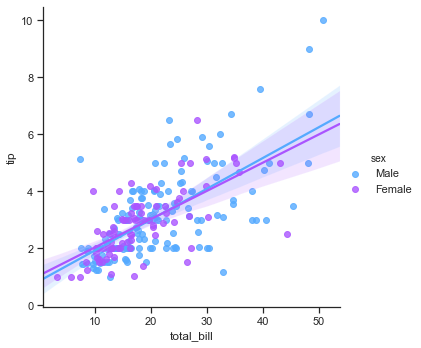

In [129]:
sns.lmplot(x='total_bill',y = 'tip',data = tips, hue = 'sex', 
           palette = 'cool', truncate = False)